Distribuição de tipos de administração: Counter({'Escola pública': 694, 'Escola particular': 302})
Distribuição dos níveis de educação: Counter({'Educação Infantil': 612, 'Ensino Fundamental': 598, 'Ensino Médio': 201, 'EJA - Educação para Jovens e Adultos': 84, 'Não informado': 42})
Taxa de escolarização por cidade: [('Rio das Ostras (RJ)', 98.2), ('Paranaguá (PR)', 98.0), ('Saquarema (RJ)', 96.3), ('Votorantim (SP)', 97.8), ('Catalão (GO)', 97.1), ('Jandira (SP)', 96.9), ('Maricá (RJ)', 96.4), ('São João del Rei (MG)', 99.1), ('Paracatu (MG)', 97.1), ('Macaé (RJ)', 96.9)]
Número de escolas por cidade: [('Rio das Ostras (RJ)', 101), ('Paranaguá (PR)', 133), ('Saquarema (RJ)', 88), ('Votorantim (SP)', 88), ('Catalão (GO)', 70), ('Jandira (SP)', 81), ('Maricá (RJ)', 107), ('São João del Rei (MG)', 65), ('Paracatu (MG)', 68), ('Macaé (RJ)', 195)]


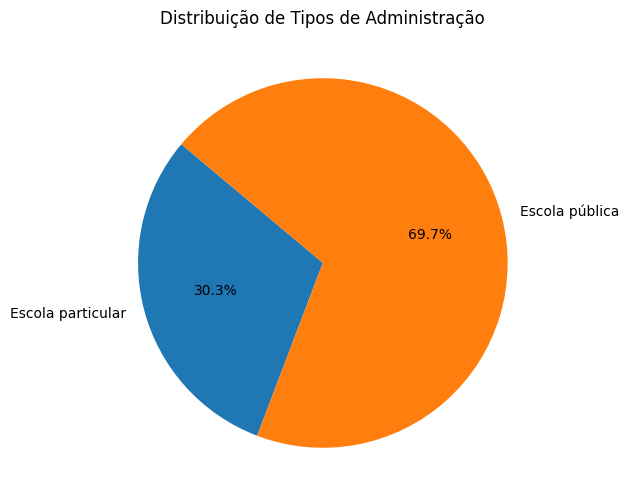

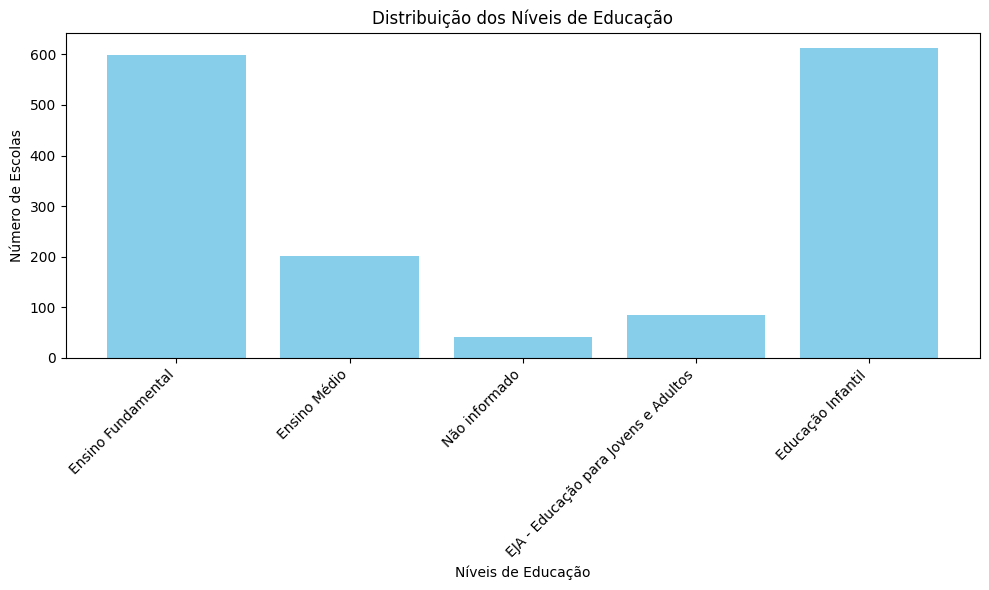

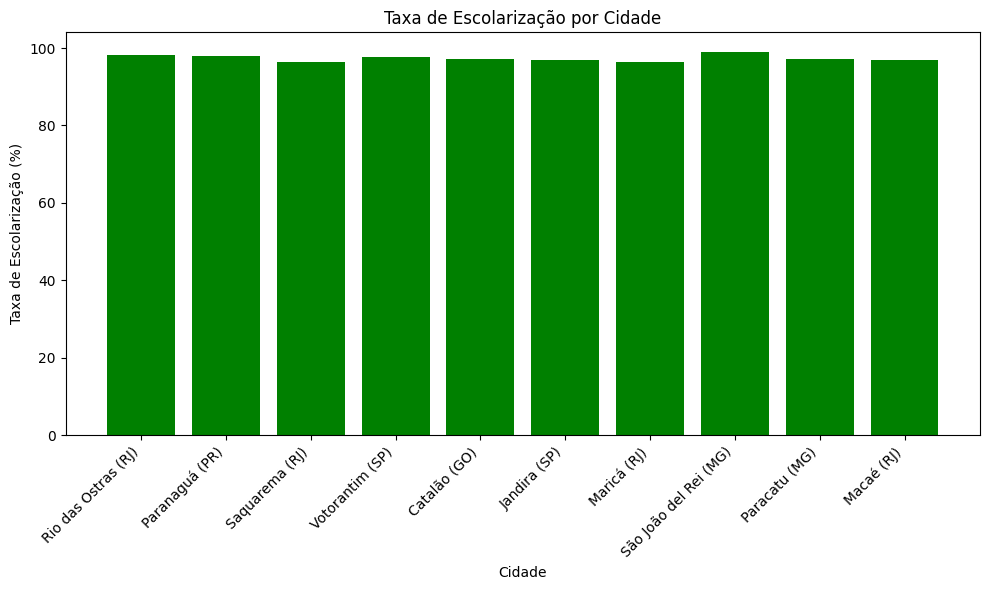

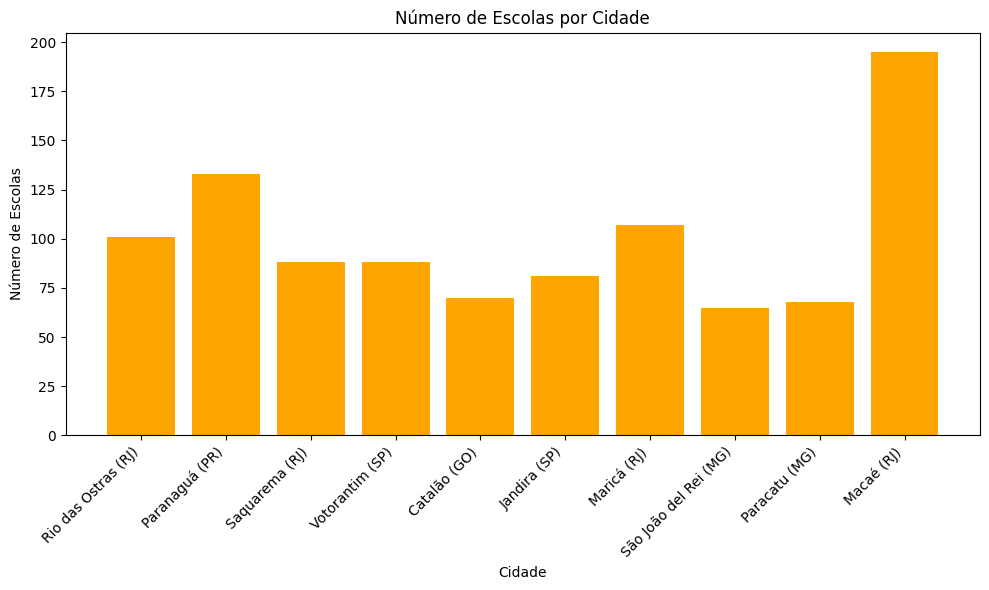

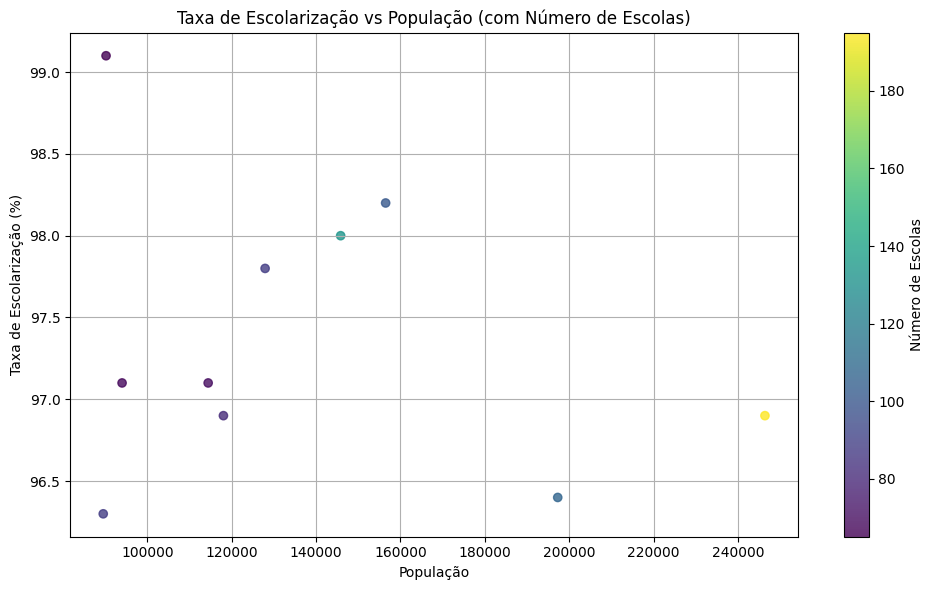

In [9]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

# Passo 1: Carregar os dados do JSON

# file_path = '/home/bridge/Documentos/UFSC/GERENCIA_DADOS/web-scrapping-education-br/cidades-completo.json
file_path = os.path.join(os.getcwd(), 'cidades-completo.json')
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Passo 2: Processar os Dados

# Análise 1: Número de escolas por tipo de administração
all_schools = [school["level_adm"] for cidade in data for school in cidade["escolas"]]
admin_counts = Counter(all_schools)

print("Distribuição de tipos de administração:", admin_counts)

# Análise 2: Distribuição dos níveis de educação
all_levels = [level for cidade in data for school in cidade["escolas"] 
              for level in (school["niveis_educacao"] if isinstance(school["niveis_educacao"], list) else [school["niveis_educacao"]])]
level_counts = Counter(all_levels)

print("Distribuição dos níveis de educação:", level_counts)

# Análise 3: Taxa de escolarização por cidade
education_rates = [(cidade["cidade"], float(cidade["dados_ibge"]["taxa_escolarizacao"].replace(",", "."))) for cidade in data]

print("Taxa de escolarização por cidade:", education_rates)

# Análise 4: Número de escolas por cidade
school_counts_by_city = [(cidade["cidade"], len(cidade["escolas"])) for cidade in data]

print("Número de escolas por cidade:", school_counts_by_city)

# Análise 5: Relação entre taxa de escolarização, população e número de escolas
education_vs_population_schools = [
    (
        cidade["cidade"],
        float(cidade["dados_ibge"]["taxa_escolarizacao"].replace(",", ".")),
        int(cidade["dados_ibge"]["populacao"].replace(".", "")),
        len(cidade["escolas"])
    )
    for cidade in data if "dados_ibge" in cidade
]

# Passo 3: Gerar os Gráficos

# Gráfico 1: Distribuição de tipos de administração

plt.figure(figsize=(8, 6))
plt.pie(admin_counts.values(), labels=admin_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribuição de Tipos de Administração")
plt.show()

# Gráfico 2: Níveis de educação oferecidos
plt.figure(figsize=(10, 6))
plt.bar(level_counts.keys(), level_counts.values(), color="skyblue")
plt.title("Distribuição dos Níveis de Educação")
plt.xlabel("Níveis de Educação")
plt.ylabel("Número de Escolas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 3: Taxa de escolarização por cidade
cities, rates = zip(*education_rates)
plt.figure(figsize=(10, 6))
plt.bar(cities, rates, color="green")
plt.title("Taxa de Escolarização por Cidade")
plt.ylabel("Taxa de Escolarização (%)")
plt.xlabel("Cidade")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 4: Número de escolas por cidade
cities, school_counts = zip(*school_counts_by_city)
plt.figure(figsize=(10, 6))
plt.bar(cities, school_counts, color="orange")
plt.title("Número de Escolas por Cidade")
plt.ylabel("Número de Escolas")
plt.xlabel("Cidade")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 5: Relação entre taxa de escolarização, população e número de escolas
education_rates, populations, school_counts = zip(*[
    (rate, population, schools) for _, rate, population, schools in education_vs_population_schools
])

plt.figure(figsize=(10, 6))
scatter = plt.scatter(populations, education_rates, c=school_counts, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label="Número de Escolas")
plt.title("Taxa de Escolarização vs População (com Número de Escolas)")
plt.xlabel("População")
plt.ylabel("Taxa de Escolarização (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


<h4>GRÁFICO 1</h4>

<h4>GRÁFICO 2</h4>

<h4>GRÁFICO 3</h4>

<h4>GRÁFICO 4</h4>

<h4>GRÁFICO 5</h4>